# Sonar Data Set Prediction

In [2]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the Dataset:
sonar = pd.read_csv('sonar.all-data')
print(sonar.shape)
sonar.head()

(208, 62)


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,2,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,3,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,4,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,5,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
#Resetting the index and dropping unnecessary columns:
sonar.drop(columns='Unnamed: 0',axis=1,inplace=True)

False


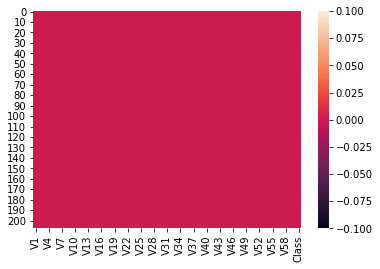

In [5]:
#Checking for null values:
print(sonar.isnull().values.any())
sns.heatmap(sonar.isnull())

In [51]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
sonar.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [6]:
#Exploratory Data Analysis
#Univarite Analysis
#Multivariate Analysis
#Bivariate Analysis
#Checking the impact of independent variable on dependant variable.

out of 207 54.0 is metal and 47.0 is rock


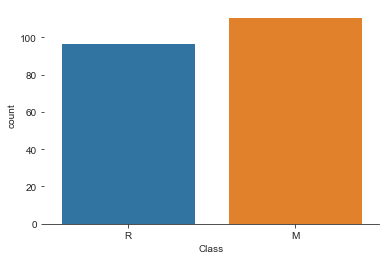

In [7]:
#Univariate Analysis checking count of Target Class:
sns.set_style('ticks')
sns.countplot(sonar['Class'])
sns.despine(left=True)
metals = round((sonar['Class'].value_counts().values[0]/207)*100)
Rocks = round((sonar['Class'].value_counts().values[1]/207)*100)
print("out of 207 {} is metal and {} is rock".format(metals,Rocks))

In [8]:
#Feature Engineering:
sonar['Class'] = sonar['Class'].apply(lambda x:0 if x == 'M' else 1)

In [9]:
sonar['Class'].value_counts()

0    111
1     97
Name: Class, dtype: int64

In [10]:
#Selecting dependant and independent Variable.
X = sonar.drop('Class',axis=1)
y = sonar['Class']

In [11]:
#Applying PCA to reduce dimension of data and make it more scalable:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
xpca = pca.fit_transform(X)
X = xpca
X = pd.DataFrame(data=X,columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10'])

In [12]:
print(X.shape)
X.head()

(208, 10)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277


In [13]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

V1        AxesSubplot(0.125,0.536818;0.133621x0.343182)
V2     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
V3      AxesSubplot(0.44569,0.536818;0.133621x0.343182)
V4     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
V5     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
V6           AxesSubplot(0.125,0.125;0.133621x0.343182)
V7        AxesSubplot(0.285345,0.125;0.133621x0.343182)
V8         AxesSubplot(0.44569,0.125;0.133621x0.343182)
V9        AxesSubplot(0.606034,0.125;0.133621x0.343182)
V10       AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

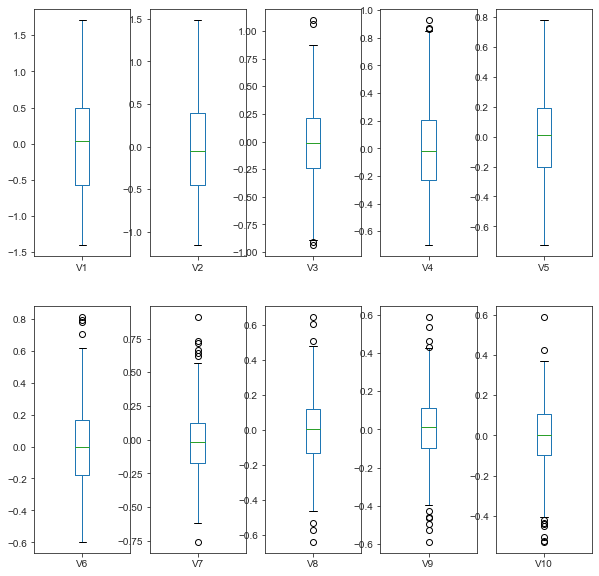

In [14]:
# Checking for Outliers by using boxplot:.
X.plot(kind='box',subplots=True,layout=(2,5),figsize=(10,10))

In [15]:
#Outliers are present as we can see from above picture but are in minimal amount so we can avoid them:

In [16]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

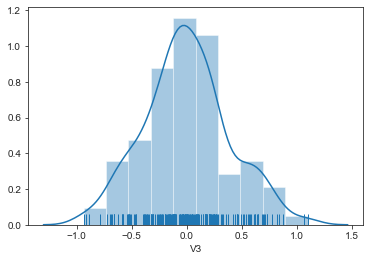

In [17]:
#We can check for skewness by using Distrution plot:
sns.distplot(X['V3'],kde=True,rug=True,bins=10)

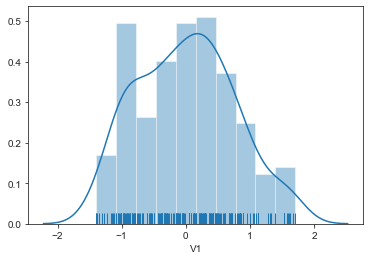

In [18]:
sns.distplot(X['V1'],kde=True,rug=True,bins=10)

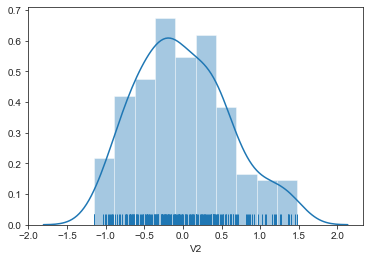

In [19]:
sns.distplot(X['V2'],kde=True,rug=True,bins=10)

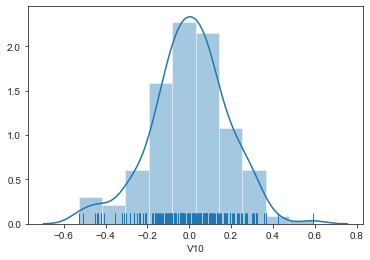

In [20]:
sns.distplot(X['V10'],kde=True,rug=True,bins=10)

In [21]:
X.skew()

V1     0.177056
V2     0.403361
V3     0.179856
V4     0.437246
V5    -0.081498
V6     0.260802
V7     0.407128
V8     0.058413
V9    -0.223131
V10   -0.266651
dtype: float64

All Variables are fine and are less than 0.55 so no skewness is present

In [22]:
# for above probelm we can going to use Random Forest Classifier Lets implement it:

In [23]:
# Lets chech the Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[0.09003458 0.09486631 0.05094437 0.24779047 0.1862303  0.06473944
 0.08498468 0.06242016 0.05781157 0.06017811]


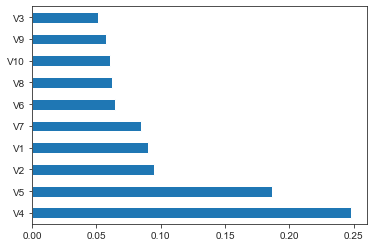

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
#Doing Training Testing Split:

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.22,random_state=45)

In [30]:
print(X_train.shape)
print(y_train.shape)

(162, 10)
(162,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(46, 10)
(46,)


In [38]:
#Using StandardScaler to Scale down the data to Standard normal Distribution:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
classifier=RandomForestClassifier()

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [42]:
# Create Hyperparametre tuning
param_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
              'criterion':['gini','entropy'],
              'bootstrap':[True,False],
              'min_samples_leaf':randint(1,4)}

In [43]:
random_grid = RandomizedSearchCV(classifier,param_distributions= param_grid,cv=9,scoring='f1',n_jobs=-1)

In [44]:
random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D5385F2670>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D5371CB9D0>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   scoring='f1')

In [45]:
random_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [47]:
random_grid.best_score_

0.7612126827039107

accuracy_score: 0.8913043478260869
[[21  0]
 [ 5 20]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.80      0.89        25

    accuracy                           0.89        46
   macro avg       0.90      0.90      0.89        46
weighted avg       0.91      0.89      0.89        46



Text(0.5, 16.0, 'Predicted label')

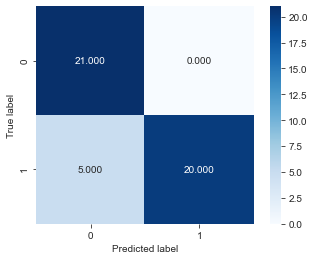

In [49]:
classifier = RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=10,max_features=2,min_samples_leaf=2,n_estimators=300)
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [50]:
#Saving the best Model for future refernce:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')
classifier_from_joblib.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0], dtype=int64)